# Descriptive statistics
So far we encountered the mean and the standard deviation as descriptive statistics. These two quantities are sufficient to fully describe normally distributed data! Alas, not all data is normally distributed so we need other measures of central tendency and dispersion.

In [21]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

plt.style.use('ncb.mplstyle')

## Measures of central tendency: Mean, median, mode
- Mean: Average value: $1/N \sum_i^N x_i$
- Median: Value at the midpoint of the distribution, such that there is an equal probability of observing values below and above the median (50% of the samples are below the median, 50% above).
- Mode: Most frequent value for a discrete distribution or the point at which a continuous pdf attains its max value.

For a normal distribution, mean, median, and mode are identical.

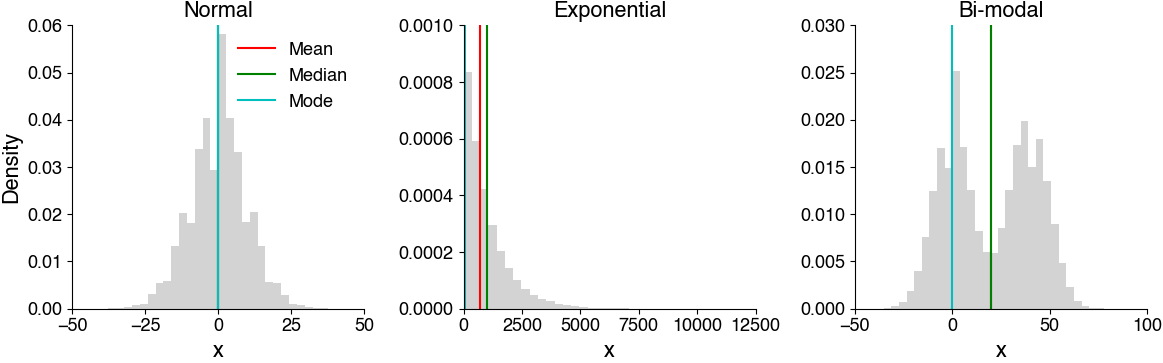

In [22]:
# mean/median/mode for gauss, bi-modal, log-normal - always plot histogram!
pdfs = [np.random.randn(100_000), np.random.exponential(100, size=100_000), np.concatenate((np.random.randn(50_000), np.random.randn(50_000)+4))]
pdfs = [(pdf * 10).astype(int) for pdf in pdfs]
pdf_names = ['Normal', 'Exponential', 'Bi-modal']

plt.figure(figsize=(12, 4))
for cnt, (pdf, name) in enumerate(zip(pdfs, pdf_names)):
    plt.subplot(1,3,cnt+1)
    plt.hist(pdf, bins=32, density=True, color='lightgrey')
    plt.axvline(np.nanmedian(pdf), c='r', label='Mean')
    plt.axvline(np.nanmean(pdf), c='g', label='Median')
    plt.axvline(scipy.stats.mode(pdf)[0], c='c', label='Mode')
    plt.title(name)
    plt.xlabel('x')
    if cnt == 0:
        plt.ylabel('Density')
        plt.legend()

plt.tight_layout()
plt.savefig('fig/5.02_descriptive_stats1.png')
plt.show()

## Measures of dispersion: Variance, standard deviation and inter-quartile range
- Variance: $\sigma^2 = 1/(N-1) \sum_i^N (x_i - \hat{x})^2$ ($\hat{x}$ is the mean of all x)
- Standard deviation is the square root of the variance: $\sigma = \sqrt{\sigma^2}$. Useful for normal data.
- Inter-quartile range (IQR): Quartiles split the data into 4 parts each with equal number of samples - the first quartile contains the 25% of samples with the lowest values, the last quartile contains the 25% of the samples with the highest values. The interquartile range is the range of data that spans the central 50% of the distribution. Useful for non-normal (asymmetrical) data.

__Note__ The variance measures the average squared distance of the samples from the sapmle mean. Why then use a normalizaton factor of $N-1$, instead of $N$ as expected for an average? Turns out the values obtained with normalization $N$ are biased - you will explore this in the exercise.

<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:30: SyntaxWarning: invalid escape sequence '\p'
<>:31: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:30: SyntaxWarning: invalid escape sequence '\p'
<>:31: SyntaxWarning: invalid escape sequence '\p'
/var/folders/bc/5m_c7nkj1vnc2w7xmmnhpfww0000gn/T/ipykernel_96149/2088512525.py:10: SyntaxWarning: invalid escape sequence '\p'
  plt.plot([np.nanmean(pdf) - np.nanstd(pdf), np.nanmean(pdf) + np.nanstd(pdf)], [0.0023, 0.0023], c='r', label='68%, $\pm\sigma$')
/var/folders/bc/5m_c7nkj1vnc2w7xmmnhpfww0000gn/T/ipykernel_96149/2088512525.py:11: SyntaxWarning: invalid escape sequence '\p'
  plt.plot([np.nanmean(pdf) - 2*np.nanstd(pdf), np.nanmean(pdf) + 2*np.nanstd(pdf)], [0.0006, 0.0006], c='orange', label='95%, $\pm2\sigma$')
/var/folders/bc/5m_c7nkj1vnc2w7xmmnhpfww0000gn/T/ipykernel_96149

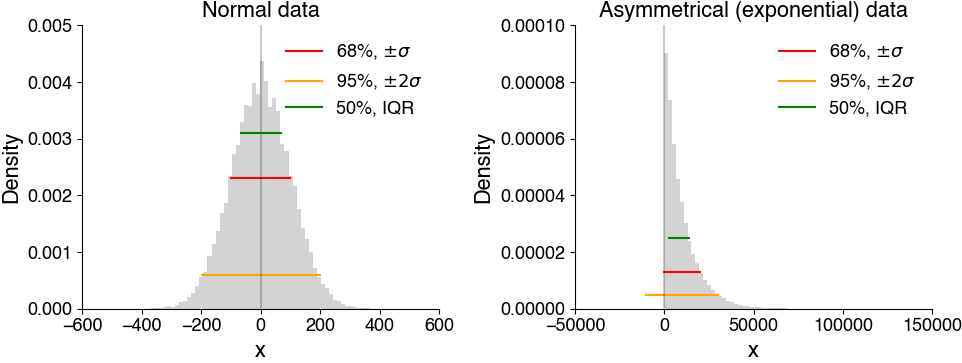

In [3]:
# mean/median/mode for gauss, bi-modal, log-normal - always plot histogram!
pdfs = [np.random.randn(100_000)]#, np.random.exponential(100, size=100_000), np.concatenate((np.random.randn(50_000), np.random.randn(50_000)+4))]
pdfs = [(pdf * 100).astype(int) for pdf in pdfs]
pdf_names = ['Normal', 'Exponential', 'Bi-modal']

plt.figure(figsize=(10, 4))
for cnt, (pdf, name) in enumerate(zip(pdfs, pdf_names)):
    plt.subplot(1,2,1)
    plt.hist(pdf, bins=64, density=True, color='lightgrey')
    plt.plot([np.nanmean(pdf) - np.nanstd(pdf), np.nanmean(pdf) + np.nanstd(pdf)], [0.0023, 0.0023], c='r', label='68%, $\pm\sigma$')
    plt.plot([np.nanmean(pdf) - 2*np.nanstd(pdf), np.nanmean(pdf) + 2*np.nanstd(pdf)], [0.0006, 0.0006], c='orange', label='95%, $\pm2\sigma$')
    plt.axvline(0, c='k', alpha=0.2)
    plt.plot([np.percentile(pdf, 25),  np.percentile(pdf, 75)], [0.0031, 0.0031], c='g', label='50%, IQR')

    plt.title('Normal data')
    plt.xlabel('x')
    if cnt == 0:
        plt.ylabel('Density')
        plt.legend()

# mean/median/mode for gauss, bi-modal, log-normal - always plot histogram!
pdfs = [np.random.exponential(100, size=100_000)]
pdfs = [(pdf * 100).astype(int) for pdf in pdfs]
pdf_names = ['Normal', 'Exponential', 'Bi-modal']

# plt.figure(figsize=(12, 4))
for cnt, (pdf, name) in enumerate(zip(pdfs, pdf_names)):
    plt.subplot(1,2,2)
    plt.hist(pdf, bins=64, density=True, color='lightgrey')
    plt.plot([np.nanmean(pdf) - np.nanstd(pdf), np.nanmean(pdf) + np.nanstd(pdf)], [0.000013, 0.000013], c='r', label='68%, $\pm\sigma$')
    plt.plot([np.nanmean(pdf) - 2*np.nanstd(pdf), np.nanmean(pdf) + 2*np.nanstd(pdf)], [0.000005, 0.000005], c='orange', label='95%, $\pm2\sigma$')
    plt.axvline(0, c='k', alpha=0.2)
    plt.plot([np.percentile(pdf, 25),  np.percentile(pdf, 75)], [0.000025, 0.000025], c='g', label='50%, IQR')
    plt.title('Asymmetrical (exponential) data')
    plt.xlabel('x')
    if cnt == 0:
        plt.ylabel('Density')
        plt.legend()
plt.tight_layout()
plt.savefig('fig/5.02_descriptive_stats2.png')
plt.show()

### Mini Exercise
- Visualize the distribution of the data in x
- Show the mean, median, and mode of the distribution as vertical lines. Why is the mean greater than the median? Why is the mode smaller than the mean?

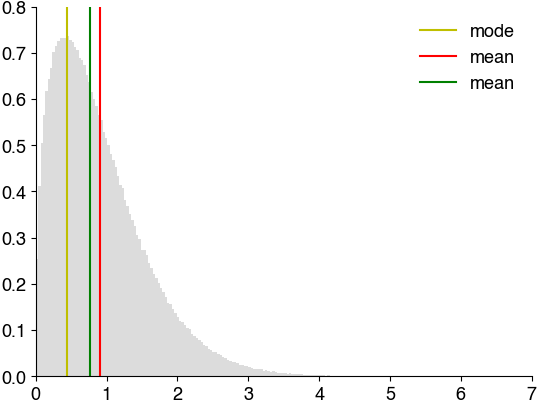

In [20]:
x = np.random.weibull(1.4, (1_000_000))  # generate 100k random numbers from a probability distribution

# your solution here
counts, bins, bars = plt.hist(x, bins=200, density=True, color='gainsboro')

mode = bins[np.argmax(counts)]
plt.axvline(mode, c='y', label='mode')
plt.axvline(np.mean(x), c='r', label='mean')
plt.axvline(np.median(x), c='g', label='mean')

plt.legend()
plt.show()

## Percentiles
Median and quartiles are special cases of percentiles.
Is the value at or below which a given percentage of all samples falls.

- The median is the 50th percentile - 50% of all samples fall below the median.
- The first quartile is the 25th percentile - 25% of all samples fall below the quartile.
- 99% of all samples fall below the 99th percentile.

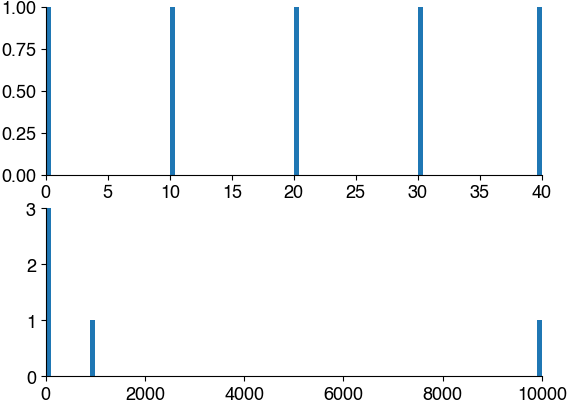

np.float64(2222.2)

In [5]:
# median, IQR, perceitiles are rank-based descriptive statistics
x1 = [0, 10, 20, 30, 40]
x2 = [1, 10, 100, 1000, 10000]

plt.subplot(2, 1, 1)
plt.hist(x1, bins=100)
plt.subplot(2, 1, 2)
plt.hist(x2, bins=100)
plt.show()

# compute the ranks of the data values:
x1_rank = [1,2,3,4,5]
x2_rank = [1,2,3,4,5]
np.mean(x2)